In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox


# Custom functions
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

# MAKE LOG PRICE! Then take first order difference

## ARIMA forecasting [DAILY]

In [3]:
#Loading the data
corn_raw = pd.read_csv('data/corn.csv', header = 2)

# Process all of the data
CORN = process_data(corn_raw, 'CORN', start_date = '2019-01-01', end_date='2020-01-01') 

# Take log values
CORN.loc[:,"CORN"] = np.log(CORN.CORN)

#plt.plot(CORN.Date, CORN.CORN)
#plt.xticks(rotation=45)
#plt.show()

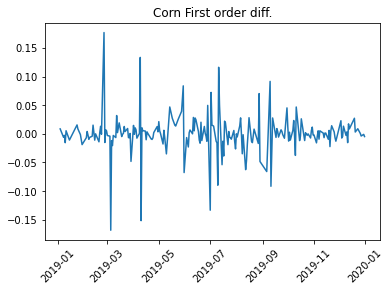

In [4]:
plt.plot(CORN.Date, CORN.CORN.diff(periods=1))
plt.title("Corn First order diff.")
plt.xticks(rotation=45)

plt.show()

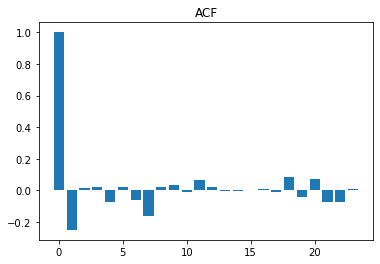

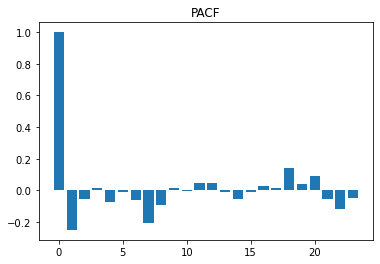

In [5]:
# ACF and PACF
order = 1
acf_list = acf(CORN.CORN.diff(periods=order).iloc[order:])
plt.bar(np.arange(0,len(acf_list), 1), acf_list)
plt.title("ACF"); plt.show()

pacf_list = pacf(CORN.CORN.diff(periods=order).iloc[order:])
plt.bar(np.arange(0,len(pacf_list), 1), pacf_list)
plt.title("PACF"); plt.show()

### ARIMA (p,d,q): Maybe ARIMA(1,1,0)... maybe ARIMA(0,1,1)... if I squint then both the PACF and ACF show a cutoff off after lag 1
### Best guess is ARIMA(0,1,1), because the cutoff after lag 1 is most evident in the ACF. 

## One day ahead forecasting 

In [ ]:
# Rolling window

training_days = 30

true_values = []
predicted_values = []
dates = []
for i in range(int(CORN.shape[0] - training_days)):
    training_df = CORN.iloc[i:i+training_days]
    test_df = CORN.iloc[i+training_days]
    
    #print(training_df.CORN)
    #Test with ARMA(1,1)
    model = ARIMA(training_df.CORN, order=(0,1,1))
    results = model.fit()
    one_step_ahead_forecast = results.get_forecast(1).summary_frame().iloc[0,0]
    
    true_values.append(test_df.CORN)
    predicted_values.append(one_step_ahead_forecast)
    dates.append(test_df.Date)
    

Text(0.5, 1.0, 'Corn ARIMA one-step-ahead forecasting')

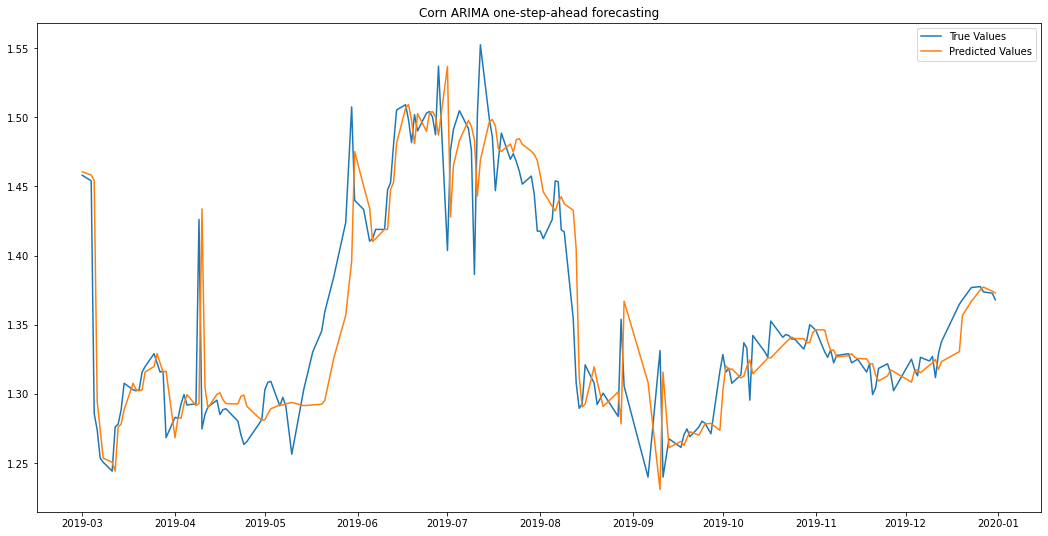

In [7]:
plt.figure(figsize=(18,9))
plt.plot(dates, true_values, dates, predicted_values)
plt.legend(["True Values", "Predicted Values"])
plt.title("Corn ARIMA one-step-ahead forecasting")

## Model Evaluation